In [9]:
__author__ = 'Ksenia Voronaya'

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

import pylab
import numpy
import matplotlib

In [2]:
data = fetch_20newsgroups(subset='all', shuffle=True)

print('List of the all categories:\n{}').format(list(data.target_names))
print('Number of categories:\n{}').format(len(data.target_names))
print('Size of corpus (number of texts):\n{}').format(len(data.data))

List of the all categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of categories:
20
Size of corpus (number of texts):
18846


In [3]:
# Convert a collection of raw documents to a matrix of TF-IDF features
tf_idf = TfidfVectorizer(stop_words='english').fit_transform(data.data)

In [4]:
print('Matrix size:\n{}').format(tf_idf.shape)

Matrix size:
(18846, 173452)


In [5]:
# Clustering on 20 classes
kmeans= KMeans(n_clusters=len(data.target_names), n_init = 1)

In [6]:
km_clustering = kmeans.fit(tf_idf)

In [7]:
# Dimensionality reduction
svd2 = TruncatedSVD(2).fit_transform(tf_idf)

In [10]:
coloring = matplotlib.cm.rainbow(numpy.linspace(0, 1, 20))

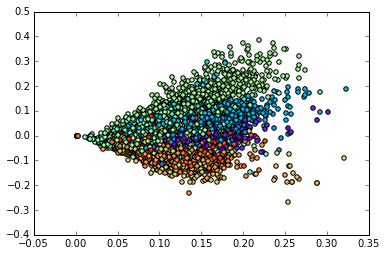

In [14]:
# Clustering on 20 classes
for i in range(0, svd2.shape[0]):
    pylab.scatter(svd2[i,0], svd2[i,1], c=coloring[km_clustering.labels_[i]])
pylab.show()

In [12]:
# Clustering on 5 classes
kmeans_5class= KMeans(n_clusters=5, n_init = 1)
km_clustering_5class = kmeans_5class.fit(tf_idf)

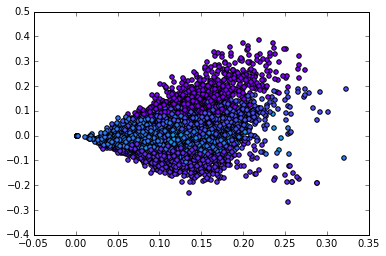

In [15]:
# Clustering on 5 classes
for i in range(0, svd2.shape[0]):
    pylab.scatter(svd2[i,0], svd2[i,1], c=coloring[km_clustering_5class.labels_[i]])
pylab.show()